# Lab 2: Propagation of Uncertainty I {-}

Name: 

## Activity I:  The pendulum (50 pts)
### Equipment needed:
1. Pendulum. (We have some pre-made, or you can tie a string to a mass)
2. Metal support stand for pendulum to swing from.
3. Photogate.

### Goal:  
By taking measurements on a simple pendulum, calculate the acceleration due to gravity with its associated uncertainty.  Compare to the known value for Rexburg.

### Procedure:  
1. Assemble five pendulums of different lengths, with the lengths ranging from $0.25$ m to $2.0$ m.  
2. For each pendulum, perform the following:  
   1. Measure the distance from the support point to the center of the pendulum.  This is the length of the pendulum $L$.  Assign an uncertainty to this measurement.
   2. Release the pendulum from a small initial angle (no bigger than $15^\circ$ from the vertical) and use the photogate to measure the period $T$ of the pendulum with its associated uncertainty. (The period of a pendulum is the time it take to make one full cycle.)
   3. Place all of your lengths and periods and their uncertainties into numpy arrays.
3. Calculate the acceleration due to gravity ($g$) using $g = {4 \pi^2 L \over T^2}$.
4. Using the methods discussed above determine the equation for calculating the uncertainty in $g$.  Use $\LaTeX$ syntax to complete the math equation below $$ \delta g = \sqrt{({ 4 \pi^2 \over T^2}\delta L)^2 + ({4\pi^2 L \over T^3}\delta T)^2}$$
5. Calculate the uncertainty and **fractional uncertainty** in $g$ in the code cell below.
8. Put your data in a dataframe and display the dataframe to visually verify that it has 10 rows and 6 columns. The columns should be $L$, $T$, $g$ and their uncertainties.  Give the appropriate names. 
9. Construct a multi-figure plot containing two plots.  The first plot should be period vs length and the other plot should be g vs. length. The points on both plots should have error bars attached.
10. Add axes labels and titles to both of your plots. 
11. Analyze the results to answer the following questions:  
  1. Which result has the lowest uncertainty? Can you explain why?  
  2. What function do you think best represents the relationship between $L$ and $T$?(We will study curve-fitting in a later lab.)  
  3. The accepted value of $g$ for Rexburg is $g = 9.80056$ m/s$^2$.  Do your calculations agree with this value to within your calculated uncertainties?  
  
  > Response:


,T (s),dT (s),L (m),dL (m),g m/s^2,dg (m/s^2)
0,2.07,0.02,1.09,0.01,10.042586,0.133804
1,1.97,0.02,0.98,0.01,9.969040,0.143496
2,1.86,0.02,0.86,0.01,9.813689,0.155425
3,1.76,0.02,0.78,0.01,9.940976,0.170307
4,1.50,0.02,0.57,0.01,10.001199,0.220382
5,1.37,0.02,0.46,0.01,9.675567,0.253365
6,1.27,0.02,0.40,0.01,9.790667,0.289281


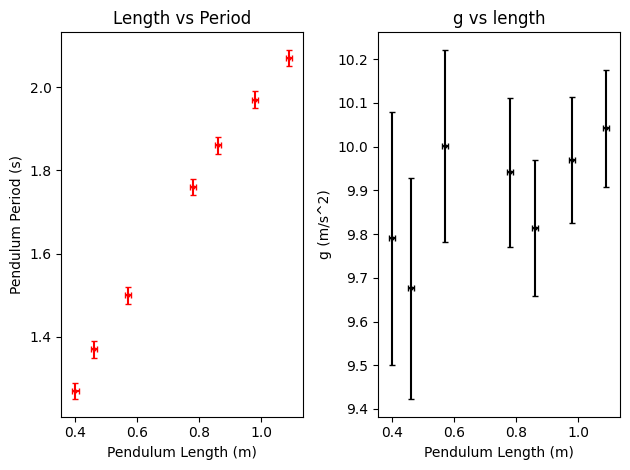

In [22]:
#| eval: false
#| echo: true
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline



T =    np.array([2.07,1.97,1.86,1.76,1.50,1.37,1.27])# Create array of period values.
un_T =  np.array([0.02,0.02,0.02,0.02,0.02,0.02,0.02])# Create array of uncertainties in the period measurements.
L =    np.array([1.09,0.98,0.86,0.78,0.57,0.46,0.4]) # Create array of length values.
un_L =  np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.01])# Create array of uncertainties in the length measurements.
g =     4 * np.pi**2 * L/T**2# Calculate g for the whole data set.
un_g =   np.sqrt(( 4 * np.pi**2 /T**2 * un_L)**2 + (4 * np.pi**2 * L/T**3 * un_T)**2)# Calculate the uncertainty in g for the whole data set.
frac_un =  g/un_g# Calculate fractional uncertainties.

df =  pd.DataFrame(np.transpose([T,un_T,L,un_L,g,un_g]),columns = ["T (s)", "dT (s)", "L (m)", "dL (m)", "g m/s^2","dg (m/s^2)"])          # Creat a dataframe of your data. Give the columns appropriate names
display(df) # Display the dataframe

# Construct a multi-figure plot below.
fig = plt.figure()            
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.errorbar(L,T,yerr = un_T,xerr = un_L,fmt = 'ro',capsize = 2,ms = 2)
#ax1.set_xlim(0.38,0.42)
#ax1.set_ylim(1.2,1.3)
ax1.set_xlabel("Pendulum Length (m)")
ax1.set_ylabel("Pendulum Period (s)")
ax1.set_title("Length vs Period")

ax2.errorbar(L,g,yerr = un_g,xerr = un_L,fmt = 'ko',capsize = 2,ms = 2)
ax2.set_xlabel("Pendulum Length (m)")
ax2.set_ylabel("g (m/s^2)")
ax2.set_title("g vs length")
plt.tight_layout()



## Activity II (50 points)

### Equipment needed
1. Meter Stick
2. Stopwatch (the one on your phone will do fine.)
3. Tennis ball.

### Goal
By measuring the fall time for an object in free fall, calculate the acceleration due to gravity here in Rexburg.

### Procedure
1. Find a location in the building that will allow the greatest drop distance for the tennis ball. (the front foyer is a good choice.)  Measure the distance from the release point to the ground with its associated uncertainty.  Record your values in the code cell provided below.
2. Using a stopwatch, measure the fall time with its associated uncertainty.  Record the values in the code cell provided below.  Note: typical reaction times are around $0.25$ s. 
3. Repeat steps 1 and 2 **ten** more times to obtain ten data points. Place your heights and drop times and their uncertainties in numpy arrays.
4. Using the equation below, calculate the acceleration due to gravity for all 10 data points. $$g = {2 h \over t^2}$$ 
5. Using the methods discussed above determine the equation for calculating the uncertainty in $g$.  Use $\LaTeX$ syntax to complete the math equation below $$ \delta g = \sqrt{({2\over t^2} \delta h)^2 + ({2 h \over t^3} \delta t)^2}$$
6. Using the equation from step 5, calculate the uncertainty in $g$ in the code cell below for all 10 data points.  
7. Put your data in a dataframe and display the dataframe to visually verify that it has 10 rows and 6 columns. 
8. Construct a multi-figure plot containing two plots.  The first plot should be $g$ vs trial number and the other plot should be fall time vs. fall distance. The points on both plots should have error bars attached.
9. Add axes labels and titles to both of your plots.
10. Using your results, answer the following questions:
    1. Are your ten g values consistent with one another to within their stated uncertainties. Explain.
    2. What function do you think describes the relationship between the fall distance and the fall time. (We will study curve-fitting in a later lab.)
    3. Which of your g values agree with the accepted value of g for Rexburg given in the first exercise.
    
    > Response:


,Fall Distance (m),δd (m),Fall Times (s),δt (s),g (m/s^2),δg (m/s^2)
0,1.0,0.05,0.50,0.2,8.000000,3.224903
1,1.5,0.05,0.60,0.2,8.333333,2.791632
2,2.0,0.05,0.70,0.2,8.163265,2.341273
3,2.5,0.05,0.75,0.2,8.888889,2.377028
4,3.0,0.05,0.80,0.4,9.375000,4.690103
5,3.5,0.05,0.85,0.3,9.688581,3.422299
6,4.0,0.05,0.90,0.2,9.876543,2.198257
7,4.5,0.05,1.10,0.3,7.438017,2.030233
8,5.0,0.05,1.15,0.5,7.561437,3.288451
9,6.0,0.05,1.25,0.4,7.680000,2.458433


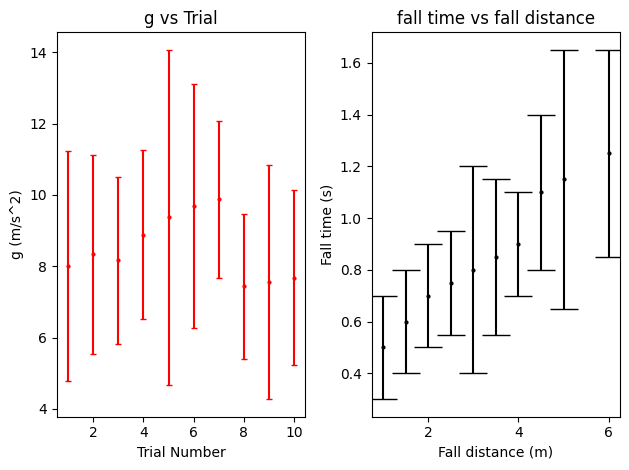

In [1]:
#| eval: false
#| echo: true

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

trial = np.array([1,2,3,4,5,6,7,8,9,10])
h =   np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,6]) # Construct an array of the fall distances
un_h =  np.array([.05,.05,.05,.05,.05,.05,.05,.05,.05,.05])   # Construct an array of the uncertainties in the fall distances.
t = np.array([0.5,0.6,0.7,0.75,0.8,0.85,0.9,1.1,1.15,1.25])      # Construct an array of the measured fall times.
un_t = np.array([.2,.2,.2,.2,.4,.3,.2,.3,.5,.4])       # Construct an array of the uncertainties in the fall times.
g = 2 * h /t**2                # Calculate g for the entire data set.
un_g = np.sqrt((2/t**2 * un_h)**2 + (2 * h /t**3 * un_t)**2)           # Calculate the uncertainty in g
frac_g = g/un_g         # Calculate the fractional uncertainty.

df = pd.DataFrame(np.transpose([h,un_h,t,un_t,g,un_g]),columns = ["Fall Distance (m)","δd (m)","Fall Times (s)","δt (s) ","g (m/s^2)","δg (m/s^2)"])# Create a dataframe of your data. Give the columns appropriate names
display(df) # Display your dataframe


# Construct plots
# Construct a multi-figure plot below.
fig = plt.figure()            
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.errorbar(trial,g,yerr = un_g,fmt = 'ro',capsize = 2,ms = 2)
#ax1.set_xlim(0.38,0.42)
#ax1.set_ylim(1.2,1.3)
ax1.set_xlabel("Trial Number")
ax1.set_ylabel("g (m/s^2)")
ax1.set_title("g vs Trial")

ax2.errorbar(h,t,yerr = un_t,fmt = 'ko',capsize = 10,ms = 2)
ax2.set_xlabel("Fall distance (m)")
ax2.set_ylabel("Fall time (s)")
ax2.set_title("fall time vs fall distance")
plt.tight_layout()